In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import time
#from utils_ing import *
from utils import *
import seaborn as sns

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

import pandas_profiling
import datetime 
%matplotlib inline

C:\Users\AIE\Anaconda3\lib\site-packages\pandas_profiling\base.py:20: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\AIE\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\AIE\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\AIE\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\AIE\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\AIE\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\AIE\Anaconda3\l

# Load Data

In [2]:
phlilps = 'D:/03 Project/01 KKU MLMED/data/phlips'
capsule = 'D:/03 Project/01 KKU MLMED/data/capsule'
output = 'D:/03 Project/01 KKU MLMED/data/output'

merge_file(phlilps, capsule, output)

output_20171112 already existed
output_20171113 already existed
output_20171114 already existed
output_20171115 already existed
output_20171116 already existed
output_20171117 already existed
output_20171118 already existed
output_20171119 already existed
output_20171120 already existed
output_20171121 already existed
output_20171122 already existed
output_20171123 already existed
output_20171124 already existed
output_20171126 already existed
output_20171127 already existed
output_20171128 already existed
output_20171129 already existed
output_20171130 already existed
output_20171201 already existed
output_20171202 already existed
output_20171203 already existed
output_20171204 already existed
output_20171205 already existed
output_20171206 already existed
output_20171207 already existed
output_20171208 already existed
output_20171209 already existed
output_20171210 already existed
output_20171211 already existed
output_20171212 already existed
output_20171213 already existed
output_2

In [3]:
df = load_data_output(output)
df.dataset_location.unique()

Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171112.csv with rows: 41862 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171113.csv with rows: 43823 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171114.csv with rows: 46535 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171115.csv with rows: 40041 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171116.csv with rows: 42820 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171117.csv with rows: 51323 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171118.csv with rows: 44596 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171119.csv with rows: 40829 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171120.csv with rows: 37238 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171121.csv with rows: 29825 
Loaded file D:/03 Project/01 KKU MLMED/data/output\output_20171122.csv with rows: 18253 
Loaded file D:/03 Pro

array(['MICU1-7FL-B6', 'MICU2-6FL-B1', 'MICU2-6FL-B2', 'MICU2-6FL-B4',
       'MICU2-6FL-B5', 'MICU2-6FL-B8', 'MICU2-6FL-B7', 'MICU2-6FL-B3',
       'MICU1-7FL-B5', 'MICU2-6FL-B6'], dtype=object)

In [4]:
firstadmit = 'D:/03 Project/01 KKU MLMED/data/Follow Up/FIRST ADMISSION 19DEC.csv'
follow = 'D:/03 Project/01 KKU MLMED/data/Follow Up/FOLLOW UP 19DEC.csv'

data = patient(df, firstadmit, follow)

already concated first admit and follow up
patient id: jp6006
location: MICU1-7FL-B5 since 2017-11-14 23:30:00 to 2017-11-16 15:53:00
-------------------------------------------------------------------------------------------------
patient id: jq7927
location: MICU1-7FL-B6 since 2017-11-14 23:35:00 to 2017-11-15 08:55:00
-------------------------------------------------------------------------------------------------
patient id: gt3853
location: MICU1-7FL-B3 since 2017-11-14 23:50:00 to 2017-11-29 23:26:00
location: MICU1-7FL-B2 since 2017-11-26 07:04:00 to 2017-11-26 07:04:00
-------------------------------------------------------------------------------------------------
patient id: dc9466
location: MICU1-7FL-B4 since 2017-11-14 23:53:00 to 2017-11-23 17:45:00
-------------------------------------------------------------------------------------------------
patient id: hn0651
location: MICU2-6FL-B7 since 2017-11-15 00:32:00 to 2017-11-18 08:44:00
--------------------------------------

location: MICU1-7FL-B1 since 2017-11-27 11:30:00 to 2017-12-07 22:43:00
-------------------------------------------------------------------------------------------------
patient id: ac0896
location: MICU2-6FL-B4 since 2017-11-27 15:56:00 to 2017-11-27 15:56:00
-------------------------------------------------------------------------------------------------
patient id: ac0980
location: MICU2-6FL-B4 since 2017-11-28 02:42:00 to 2017-11-28 02:42:00
-------------------------------------------------------------------------------------------------
patient id: jq9046
location: MICU2-6FL-B7 since 2017-11-28 15:10:00 to 2017-11-28 15:10:00
-------------------------------------------------------------------------------------------------
patient id: ax1091
location: MICU1-7FL-B2 since 2017-11-22 14:15:00 to 2017-12-02 22:45:00
location: MICU1-7FL-B5 since 2017-12-02 15:02:00 to 2017-12-09 22:34:00
location: MICU1-7FL-B6 since 2017-12-10 08:47:00 to 2017-12-11 23:31:00
----------------------------

location: MICU2-6FL-B1 since 2017-12-13 23:11:00 to 2017-12-13 23:11:00
-------------------------------------------------------------------------------------------------
patient id: bf6473
location: MICU2-6FL-B7 since 2017-12-14 15:16:00 to 2017-12-19 00:50:00
-------------------------------------------------------------------------------------------------
patient id: jr4264
location: MICU2-6FL-B1 since 2017-12-14 16:24:00 to 2017-12-18 15:41:00
-------------------------------------------------------------------------------------------------
patient id: hg9033
location: MICU1-7FL-B6 since 2017-12-15 00:15:00 to 2017-12-16 06:29:00
-------------------------------------------------------------------------------------------------
patient id: je2118
location: MICU1-7FL-B1 since 2017-12-15 04:00:00 to 2017-12-19 07:09:00
-------------------------------------------------------------------------------------------------
patient id: gi3567
location: MICU1-7FL-B5 since 2017-12-15 22:48:00 to 201

In [5]:
col = 'Respiratory Rate'
data[col].isnull().groupby(data['HN']).sum().reset_index()

,HN,Respiratory Rate
0,ac0890,3898.0
1,bh3118,29662.0
2,cz7381,41268.0
3,ef3951,1680.0
4,ef9351,526.0
5,hf3667,1.0
6,jg6236,8905.0
7,jq9064,3391.0
8,jr0476,73524.0
9,jr1352,6578.0


In [6]:
data.head(3)

,ABPd,ABPm,ABPs,Airway Resistance,Alarm Silence Status,Apnea Ventilation Delay Setting,Breathing Circuit Compliance,Breathing Circuit Leak,CVPm,Disconnect Time Setting,...,SpO2_moving_avg,SpO2_percent_change,Spontaneous Expired Tidal Volume,Spontaneous Respiratory Rate,Support Pressure Setting,Sustained Paw Alarm,dataset_datetime,dataset_location,time_in_sec,HN
351829,NaN,NaN,NaN,12.0,0.0,30.0,NaN,NaN,NaN,30.0,...,98.869565,0.001319,NaN,0.0,NaN,0.0,2017-11-20 00:03:40,MICU1-7FL-B5,1.511136e+09,nan
351830,NaN,NaN,NaN,12.0,0.0,30.0,NaN,NaN,NaN,30.0,...,98.916667,0.010952,NaN,0.0,NaN,0.0,2017-11-20 00:03:50,MICU1-7FL-B5,1.511136e+09,nan
351831,NaN,NaN,NaN,12.0,0.0,30.0,NaN,NaN,NaN,30.0,...,98.960000,0.010509,NaN,0.0,NaN,0.0,2017-11-20 00:04:00,MICU1-7FL-B5,1.511136e+09,nan


In [8]:
test = data[['dataset_datetime', 'dataset_location', 'SpO2']]

In [9]:
sum_start = lambda x: pd.rolling_sum(x[::-1], window = 2, min_periods = 0)[::-1]
test['data_y_start'] = test.groupby('dataset_location')['SpO2'].apply(sum_start)

C:\Users\AIE\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,min_periods=0,center=False).sum()

C:\Users\AIE\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
test[test['dataset_location']  == 'MICU2-6FL-B2'].head(6)

,dataset_datetime,dataset_location,SpO2,data_y_start
16724,2017-11-12 00:49:00,MICU2-6FL-B2,100.0,100.0
16725,2017-11-12 00:49:10,MICU2-6FL-B2,NaN,NaN
16726,2017-11-12 00:49:20,MICU2-6FL-B2,NaN,100.0
16727,2017-11-12 00:49:30,MICU2-6FL-B2,100.0,100.0
16728,2017-11-12 00:49:40,MICU2-6FL-B2,NaN,NaN
16729,2017-11-12 00:49:50,MICU2-6FL-B2,NaN,100.0


# Checking Y

In [29]:
df_1 = check_y(data, delta_change=-2.0, start = 1500, end = 1800)

D:\04 Git\ml-med\utils.py:151: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\04 Git\ml-med\utils.py:152: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\04 Git\ml-med\utils.py:153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\04 Git\ml-med\utils.py:154: SettingWithCopyWarning:


A value is trying to be set on 

Already created target(y)


In [30]:
data_2, features = create_features(df_1, n_before = 3)

Already created moving average features -------------------------------------------------------
Already created avg and sd of features at 0 secs before 
Already created avg and sd of features at 600 secs before 
Already created avg and sd of features at 1200 secs before 


In [31]:
data_2 = data_2[data_2['SpO2'].isnull() == False]

In [32]:
print(data_2.groupby(['y_flag']).size())

y_flag
0    304923
1      6926
dtype: int64


In [18]:
f = features.copy()
f.extend(['dataset_datetime', 'dataset_location', 'SpO2', 'Respiratory Rate', 'Mean Airway Pressure', 'Inspired Tidal Volume', 'y_flag', 'y_value'])
print(f)
data_2[data_2['dataset_location']  == 'MICU2-6FL-B2'][f].to_csv('D:/04 Git/check_value.csv')

['Respiratory Rate_moving_mean_avg', 'Mean Airway Pressure_moving_mean_avg', 'Inspired Tidal Volume_moving_mean_avg', 'SpO2_moving_mean_avg', 'Respiratory Rate_moving_sd_avg', 'Mean Airway Pressure_moving_sd_avg', 'Inspired Tidal Volume_moving_sd_avg', 'SpO2_moving_sd_avg', 'Respiratory Rate_mean0s', 'Mean Airway Pressure_mean0s', 'Inspired Tidal Volume_mean0s', 'SpO2_mean0s', 'Respiratory Rate_std0s', 'Mean Airway Pressure_std0s', 'Inspired Tidal Volume_std0s', 'SpO2_std0s', 'Respiratory Rate_mean600s', 'Mean Airway Pressure_mean600s', 'Inspired Tidal Volume_mean600s', 'SpO2_mean600s', 'Respiratory Rate_std600s', 'Mean Airway Pressure_std600s', 'Inspired Tidal Volume_std600s', 'SpO2_std600s', 'Respiratory Rate_mean1200s', 'Mean Airway Pressure_mean1200s', 'Inspired Tidal Volume_mean1200s', 'SpO2_mean1200s', 'Respiratory Rate_std1200s', 'Mean Airway Pressure_std1200s', 'Inspired Tidal Volume_std1200s', 'SpO2_std1200s', 'dataset_datetime', 'dataset_location', 'SpO2', 'Respiratory Rate',

PermissionError: [Errno 13] Permission denied: 'D:/04 Git/check_value.csv'

In [11]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools


location = 'MICU2-6FL-B1'
df_locat = data_2[data_2['dataset_location'] == location].copy()
df_locat['y_value_1'] = np.where(df_locat['y_value'] == 1, df_locat['SpO2'], float('nan') )
df_locat['y_value_2'] = np.where(df_locat['y_cut_flag'] == 'cut', df_locat['SpO2'], float('nan') )

traces = []

for i, col in enumerate(['SpO2', 'SpO2_moving_mean_avg', 'SpO2_mean0s', 'SpO2_mean600s']):
    traces.append(go.Scatter(
                    x = df_locat.dataset_datetime,
                    y = df_locat[col],
                    mode = 'lines',
                    name = col
                    ))
    
traces.append(go.Scatter(
            x = df_locat.dataset_datetime,
            y = df_locat.y_value_1,
            mode = 'markers',
            marker = dict(color = 'rgb(255,0,0)'),
            name = "'y'"
            ))
traces.append(go.Scatter(
            x = df_locat.dataset_datetime,
            y = df_locat.y_value_2,
            mode = 'markers',
            marker = dict(color = 'rgb(0,0,255)'),
            name = "'y'"
            ))



fig = go.Figure(data = traces) # , layout = layout
plot(fig, filename = location + '.html')

'file://D:\\04 Git\\ml-med\\MICU2-6FL-B1.html'

# Model

In [33]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [34]:
x_data = data_2[features].as_matrix()
y_data = data_2['y_flag'].as_matrix()
#x_train, y_train, x_test, y_test = split_data(x_data, y_data)

In [35]:
n_split = 1
test_size = 0.25
seed = 42
sss = StratifiedShuffleSplit(n_splits = n_split, test_size = test_size, random_state = seed)
print(sss)
x_train = []
y_train = []
x_test = []
y_test = []
for train_index, test_index in sss.split(x_data, y_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train1, x_test1 = x_data[train_index], x_data[test_index]
    y_train1, y_test1 = y_data[train_index], y_data[test_index]
    
    x_train.append(x_train1)
    y_train.append(y_train1)
    x_test.append(x_test1)
    y_test.append(y_test1)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.25,
            train_size=None)
TRAIN: [ 51788 295511 302626 ...,  53896   2192  96738] TEST: [227246 221454 307413 ..., 181666 288373 239598]


In [36]:
def under_sampling(labels, p):
    negative_idx = np.random.choice(np.where(labels == 0)[0], size=int(len(labels)*p), replace=False)
    positive_idx = np.where(labels==1)[0]
    return np.concatenate([negative_idx, positive_idx])

In [37]:
x_train = x_train[0]
y_train = y_train[0]
x_test = x_test[0]
y_test = y_test[0]

resampled_idx = under_sampling(y_train, 0.2)
x_resampled, y_resampled = x_train[resampled_idx], y_train[resampled_idx]

#sm = SMOTE(random_state = seed, ratio = 0.5)  # class ratio of 1
#x_resamp, y_resamp = sm.fit_sample(x_resampled, y_resampled)
#print(y_train.value_counts(), np.bincount(y_resamp))

In [38]:
print(len(x_resampled))
print(len(y_resampled))

51971
51971


In [39]:
# Algorithm gradient boosting
eval_set = [(x_test, y_test)]
clf = XGBClassifier()
clf.fit(x_resampled, y_resampled, early_stopping_rounds = 10, eval_metric = ["auc"], eval_set = eval_set, verbose = True)
print(clf)

y_pred = clf.predict(x_test)
prediction = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

results = clf.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

# plot log loss
"""import matplotlib.pyplot as pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()"""

[0]	validation_0-auc:0.666473
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.688533
[2]	validation_0-auc:0.729599
[3]	validation_0-auc:0.730076
[4]	validation_0-auc:0.782703
[5]	validation_0-auc:0.78493
[6]	validation_0-auc:0.786833
[7]	validation_0-auc:0.791392
[8]	validation_0-auc:0.791665
[9]	validation_0-auc:0.803882
[10]	validation_0-auc:0.815589
[11]	validation_0-auc:0.822784
[12]	validation_0-auc:0.826818
[13]	validation_0-auc:0.829264
[14]	validation_0-auc:0.829046
[15]	validation_0-auc:0.827776
[16]	validation_0-auc:0.830215
[17]	validation_0-auc:0.833906
[18]	validation_0-auc:0.83643
[19]	validation_0-auc:0.835875
[20]	validation_0-auc:0.837786
[21]	validation_0-auc:0.83892
[22]	validation_0-auc:0.840961
[23]	validation_0-auc:0.84503
[24]	validation_0-auc:0.846996
[25]	validation_0-auc:0.849829
[26]	validation_0-auc:0.851979
[27]	validation_0-auc:0.855168
[28]	validation_0-auc:0.855234
[29]	validation_0-auc:0.855476
[30]	validation_0-au

"import matplotlib.pyplot as pyplot\nfig, ax = pyplot.subplots()\nax.plot(x_axis, results['validation_0']['auc'], label='Train')\nax.plot(x_axis, results['validation_1']['auc'], label='Test')\nax.legend()\npyplot.ylabel('AUC')\npyplot.title('XGBoost AUC')\npyplot.show()"

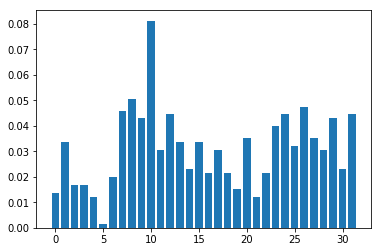

In [40]:
import matplotlib.pyplot as pyplot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [41]:
feature_imp = pd.DataFrame({"imp": clf.feature_importances_,"col": features})

In [42]:
feature_imp.sort_values("imp", ascending=False)

,col,imp
10,Inspired Tidal Volume_mean0s,0.081288
8,Respiratory Rate_mean0s,0.050613
26,Inspired Tidal Volume_mean1200s,0.047546
7,SpO2_moving_sd_avg,0.046012
31,SpO2_std1200s,0.044479
24,Respiratory Rate_mean1200s,0.044479
12,Respiratory Rate_std0s,0.044479
9,Mean Airway Pressure_mean0s,0.042945
29,Mean Airway Pressure_std1200s,0.042945
23,SpO2_std600s,0.039877


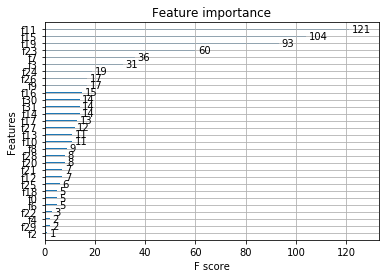

In [26]:
from xgboost import plot_importance
plot_importance(clf)
pyplot.show()

In [ ]:
param = {
    'max_dept': range(3,10,2)
    'min_child_weight': range(1,6,2)
    'early_stopping_rounds': range(10,30,10)
    }

GridSearch = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1
                                                    , n_estimators = 140
                                                    , max_dept = 5
                                                    , min_child_weight = 1
                                                    , gamma = 0
                                                    , subsample = )